In [1]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy import spatial

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\multiclass.py:13: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
C:\Users\Orest\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Orest\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any beh

In [2]:
def BFMatcher(kp1, des1, kp2, des2):# create BFMatcher object 
    bf = cv.BFMatcher(cv. NORM_L2, crossCheck=True)
    
    matches = bf.match(des1,des2) 
    matches = sorted(matches, key = lambda x:x.distance) 
    
    img = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return img

In [10]:
def CustomMatcher(kp1, des1, kp2, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2)), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    return img

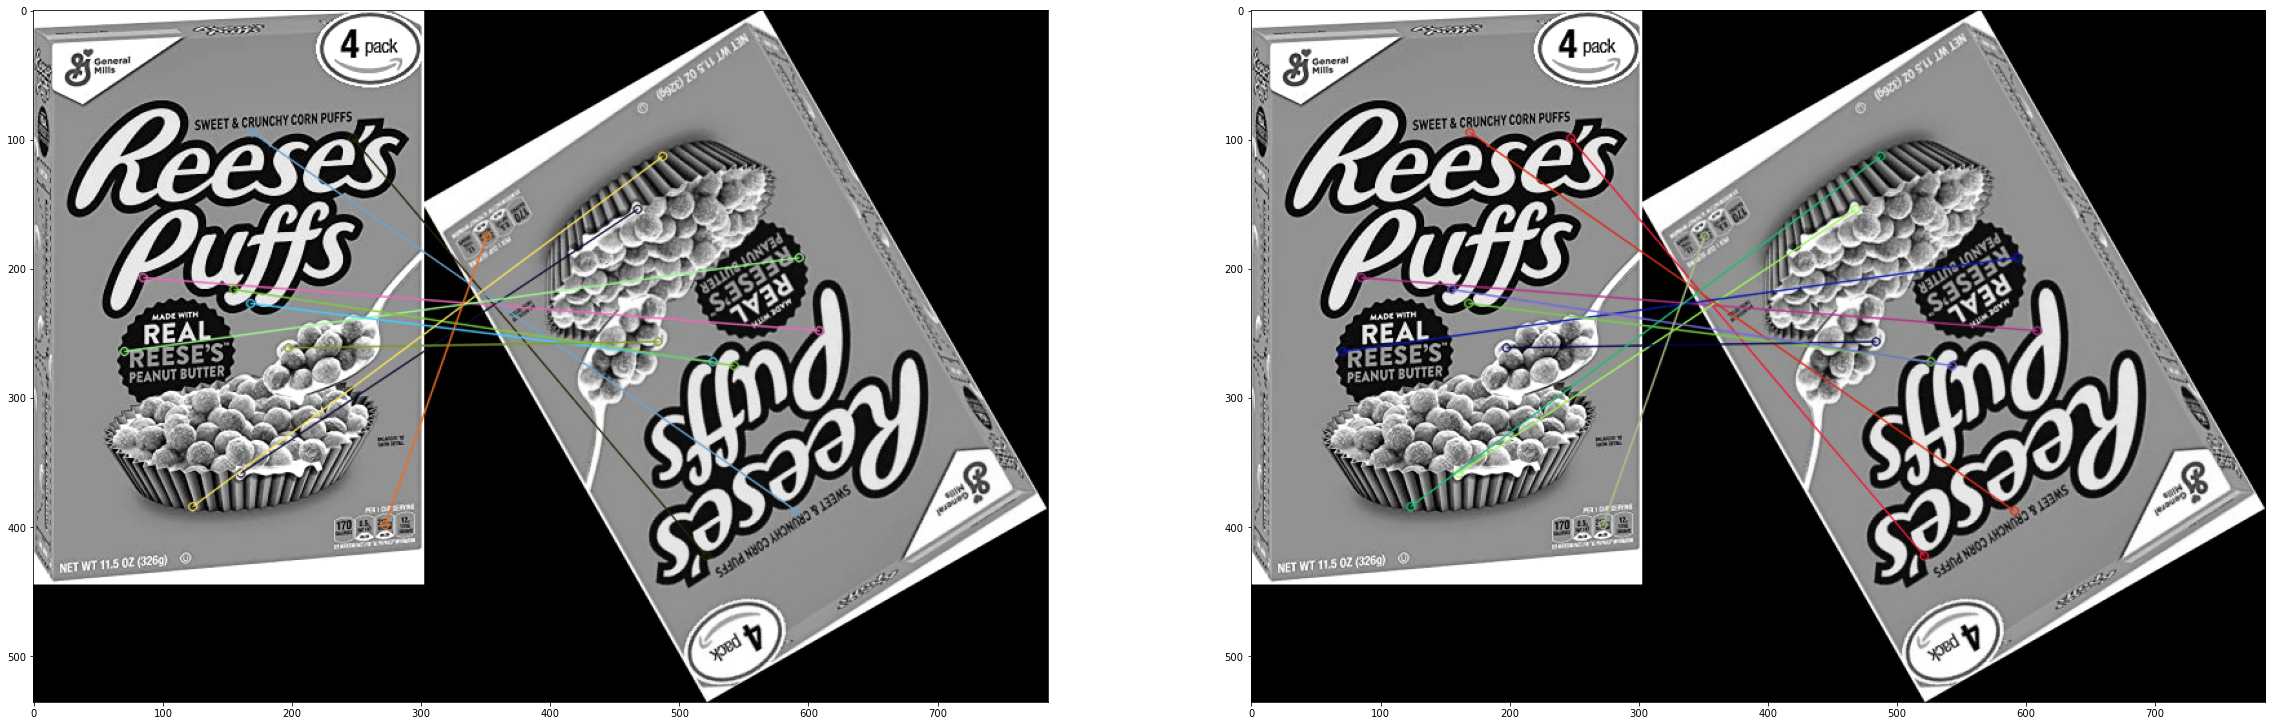

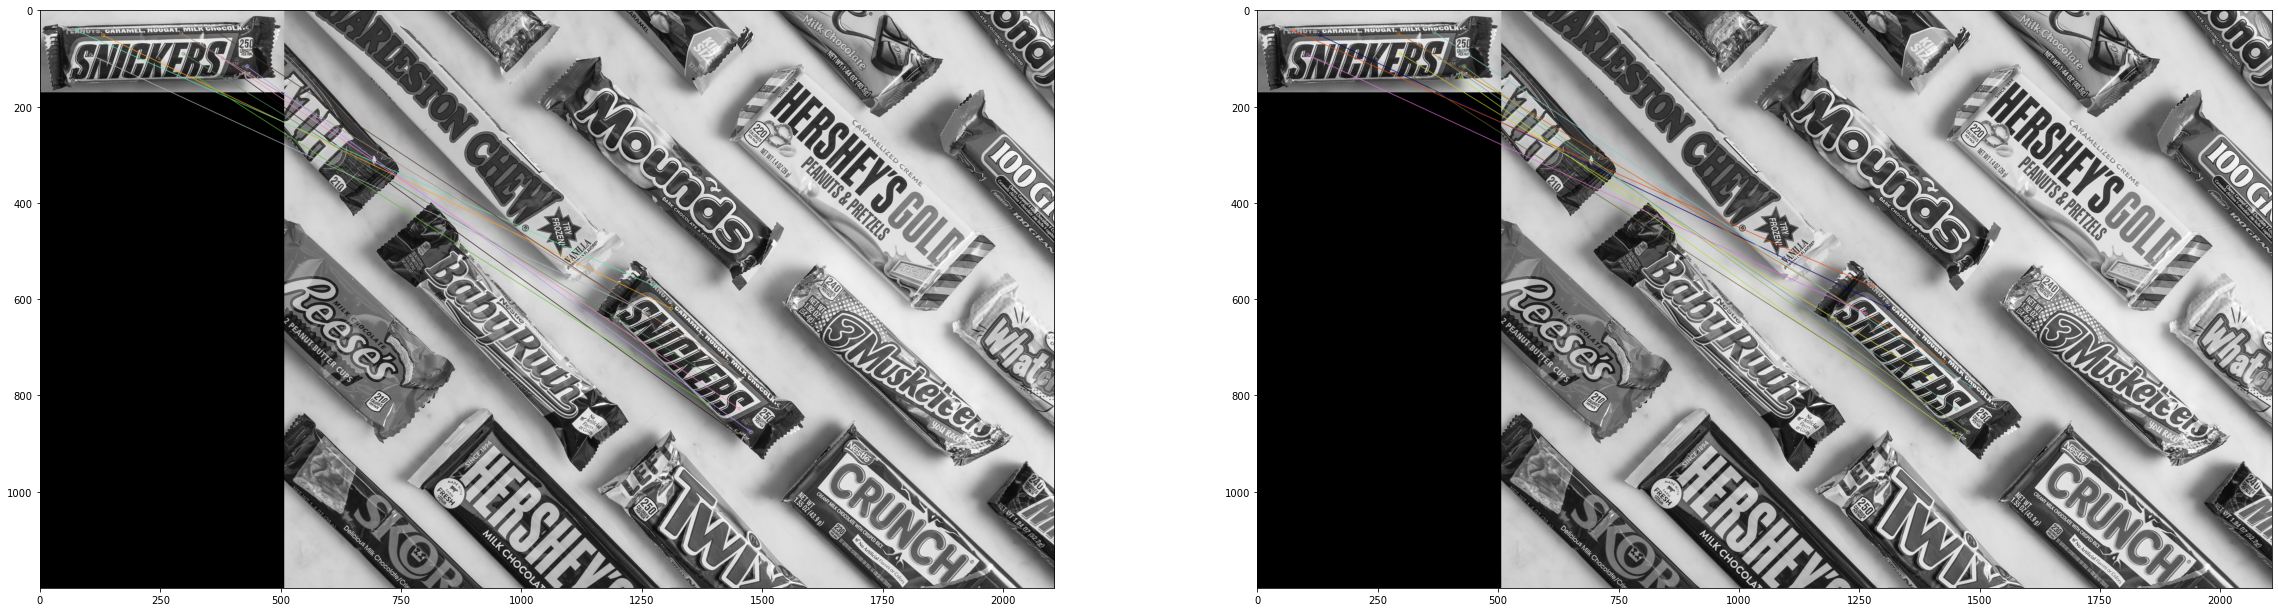

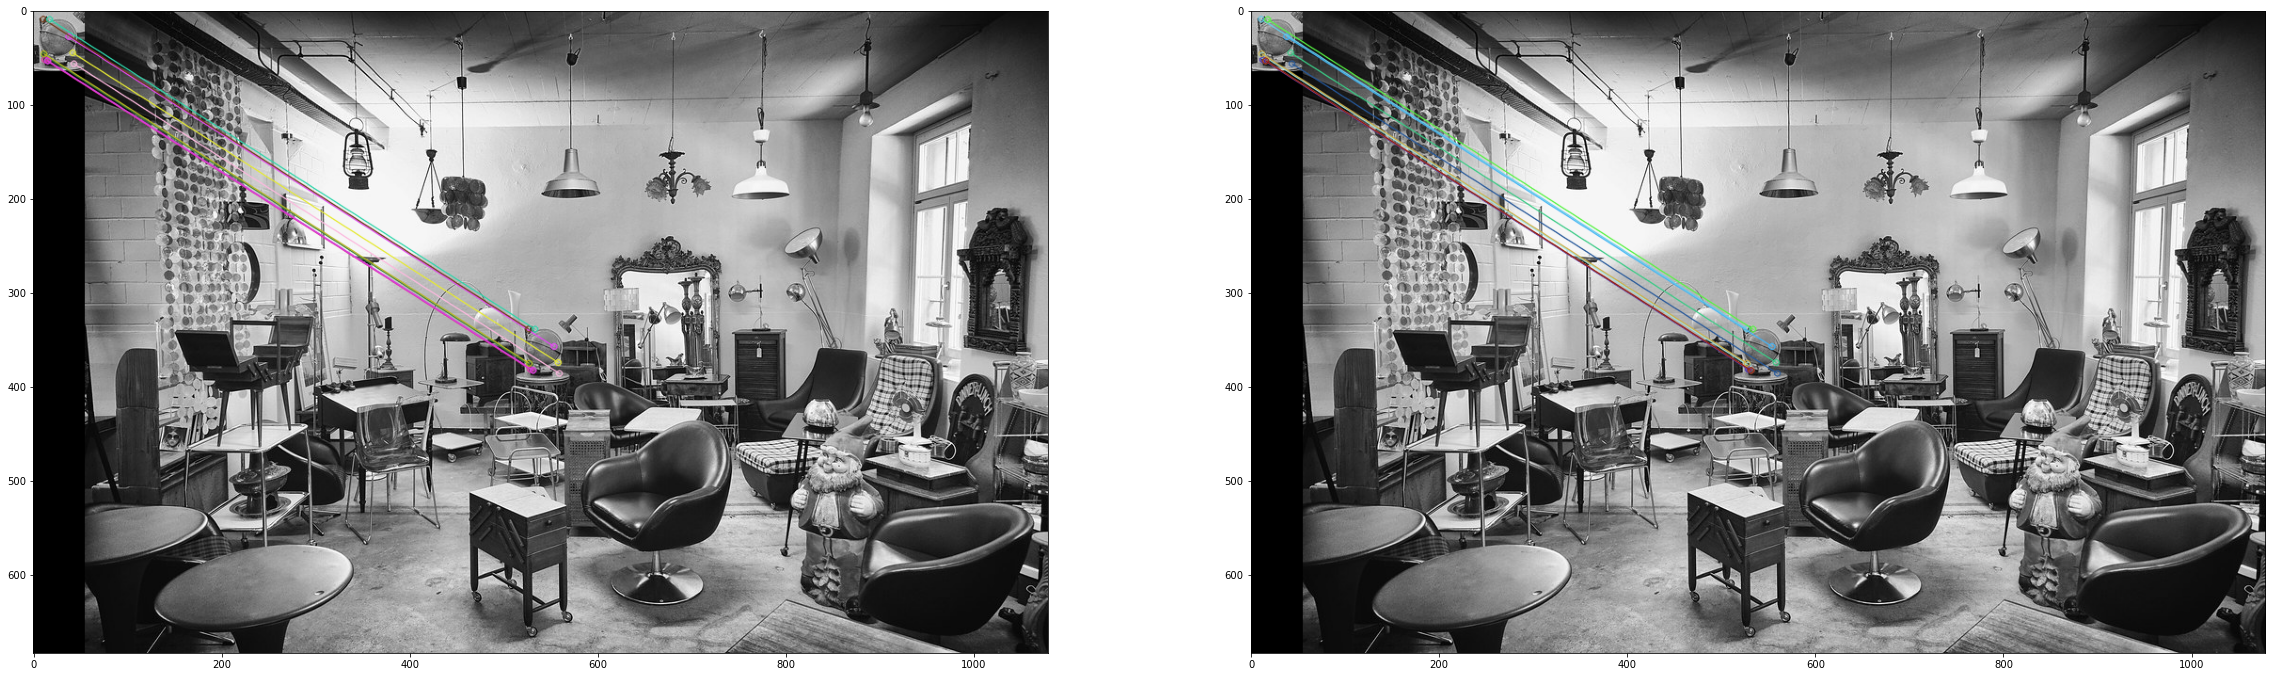

In [12]:
queries = ['./image1.jpg', './image2.jpg', './image3.jpg']
trains = ['./test1.jpg', './test2.jpg', './test3.jpg']
for i in range(len(queries)):
    img1 = cv.imread(queries[i],cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(trains[i],cv.IMREAD_GRAYSCALE)

    sift = cv.SIFT_create() 
    kp1, des1 = sift.detectAndCompute(img1,None) 
    kp2, des2 = sift.detectAndCompute(img2,None)

    fig = plt.figure()
    fig.set_figheight(40)
    fig.set_figwidth(40)

    fig.add_subplot(1, 2, 1)
    plt.imshow(BFMatcher(kp1, des1, kp2, des2))

    fig.add_subplot(1, 2, 2)
    plt.imshow(CustomMatcher(kp1, des1, kp2, des2))
